In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.stats.multitest
#import altair as alt
#alt.renderers.enable('notebook') #Necessary for Altair to work

In [2]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
transcriptomics = CPTAC.get_transcriptomics()
transcriptomics_columns = CPTAC.get_transcriptomics_cols()

#print(transcriptomics_columns)
#print(transcriptomics)

In [4]:
siteList = transcriptomics_columns

### Look through our list of sites, test for difference in transcriptomics levels when ARID1A is mutated

In [5]:
p_values = []
site_names = []
gene = 'ARID1A'

'''Perform a T-Test comparing transcriptomics levels when ARID1A is mutated vs wildtype, in tumor patients only'''
for site in siteList:
    transdf = CPTAC.compare_mutations(transcriptomics, site, gene)
    transdf = transdf.loc[transdf["Patient_Type"] == "Tumor"]
    #print(transdf)
    wtdf = transdf.loc[transdf["Mutation"] == "Wildtype"]
    mutateddf = transdf.loc[transdf["Mutation"] != "Wildtype"]
    ttest = scipy.stats.ttest_ind(wtdf[site], mutateddf[site])
    p_values.append(ttest[1])
    site_names.append(site)


In [6]:
print(p_values)
print(site_names)

[0.029689655232897332, 0.0014445222787237727, 0.24513237845133012, 0.006841439395822678, 0.0008417709356276351, 0.27657788709515607, 0.033738510528518194, 0.1771835754379716, 0.08850728482287291, 0.032015111193509374, 0.11534405040894982, 0.27859098200035226, 0.417904465250326, 0.670070348867743, 0.9064653974219756, 0.9247986665688164, 0.0024257307068124043, 0.09419600909086374, 0.8768300551502177, 0.7770525930066012, 0.3102149531270453, 0.0024530458936019225, 0.002115624248994236, 0.0002271204550851413, 0.051471085719645884, 0.48216288224874915, 0.29237604497213554, 0.5325727884504816, 0.012961992477409206, 0.45431089174510464, 0.5183088885694744, 0.0717861898191475, 0.46008760995942444, 0.44843591242493785, 0.0009370752012220999, 0.1166262861535191, 0.38120517765847894, 0.047518125590411214, 0.5857638149074321, 0.5970055269923016, 0.3089075821075356, 0.09915862249217348, 0.373314402009586, 0.1114000755216804, 0.40574315836774244, 0.00028605325181251483, 0.1452122558678528, 0.00040145

### Adjust for multiple testing using Bonferroni correction

In [7]:
bonferroniCutoff = .05/ len(siteList)
print(bonferroniCutoff)

significantSites = []
significantPvals = []

for i in range(0, len(p_values)):
    if p_values[i] <= bonferroniCutoff:
        significantPvals.append(p_values[i])
        significantSites.append(site_names[i])


1.7820864668353709e-06


In [8]:
#Print off significant sites
print(significantSites)

['ANKRD37', 'BBC3', 'C2CD6', 'CCDC36', 'CTSF', 'DIRC3', 'EYA4', 'FAM110B', 'FAM57A', 'HSPB6', 'LHCGR', 'LOC100507351', 'LRBA', 'LRRC8E', 'MAB21L2', 'MSANTD3', 'PCLAF', 'PRNP', 'RPS6KA6', 'SAPCD2', 'SCN2A', 'TDRD10', 'TUB', 'TUBG1', 'WDR34', 'ZDHHC15', 'ZNF208', 'ZNF229', 'ZNF663P', 'ZSCAN12']


In [9]:
#Print off significant p_values
print(significantPvals)

[1.7382368580878786e-06, 1.7649686039222225e-06, 4.904323670083253e-07, 1.7370280109802984e-06, 5.004872090053127e-07, 5.690524992737917e-07, 5.12192988107089e-08, 4.2599642455274165e-07, 2.793435694200713e-08, 5.727551742121599e-07, 8.169737411299089e-07, 3.71096828724175e-07, 2.1295076932123176e-07, 1.555704091002909e-06, 1.2952573456275043e-06, 3.628535030978892e-07, 1.0496408425712146e-07, 5.450613377924607e-09, 1.1259974364367532e-06, 9.569022650462823e-08, 1.1402145813064971e-06, 3.704371564919246e-07, 1.7219255954793473e-06, 1.0811947525318252e-06, 4.5495651944508407e-07, 1.4197409308935562e-06, 1.0265615688073628e-06, 7.486431905029763e-07, 1.71455768883987e-06, 2.7217708460424223e-07]


In [10]:
#Make a dict of sites-p-values

bfSignificantVals = dict(zip(significantSites, significantPvals))
print(bfSignificantVals)

{'ANKRD37': 1.7382368580878786e-06, 'BBC3': 1.7649686039222225e-06, 'C2CD6': 4.904323670083253e-07, 'CCDC36': 1.7370280109802984e-06, 'CTSF': 5.004872090053127e-07, 'DIRC3': 5.690524992737917e-07, 'EYA4': 5.12192988107089e-08, 'FAM110B': 4.2599642455274165e-07, 'FAM57A': 2.793435694200713e-08, 'HSPB6': 5.727551742121599e-07, 'LHCGR': 8.169737411299089e-07, 'LOC100507351': 3.71096828724175e-07, 'LRBA': 2.1295076932123176e-07, 'LRRC8E': 1.555704091002909e-06, 'MAB21L2': 1.2952573456275043e-06, 'MSANTD3': 3.628535030978892e-07, 'PCLAF': 1.0496408425712146e-07, 'PRNP': 5.450613377924607e-09, 'RPS6KA6': 1.1259974364367532e-06, 'SAPCD2': 9.569022650462823e-08, 'SCN2A': 1.1402145813064971e-06, 'TDRD10': 3.704371564919246e-07, 'TUB': 1.7219255954793473e-06, 'TUBG1': 1.0811947525318252e-06, 'WDR34': 4.5495651944508407e-07, 'ZDHHC15': 1.4197409308935562e-06, 'ZNF208': 1.0265615688073628e-06, 'ZNF229': 7.486431905029763e-07, 'ZNF663P': 1.71455768883987e-06, 'ZSCAN12': 2.7217708460424223e-07}


### Plot the significant sites, Mutated vs Wildtype

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


[Text(0, 0.5, 'Transcriptomics'), Text(0.5, 0, 'Mutation')]

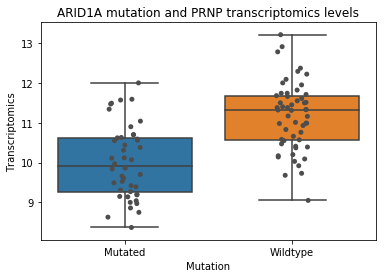

In [11]:
gene = "ARID1A"
site = "PRNP"

genedf = CPTAC.compare_mutations(transcriptomics, site, gene)
genedf = genedf.loc[genedf["Patient_Type"] == "Tumor"].drop("Patient_Type", axis = 1)
#print(genedf)


for i, row in genedf.iterrows():
    id = i
    if row['Mutation'] != 'Wildtype':
        genedf.set_value(id,'Mutation','Mutated')

phos_boxplot = sns.boxplot(data=genedf, x="Mutation",y=site)
phos_boxplot.set_title(gene + " mutation and " + site + " transcriptomics levels")
phos_boxplot = sns.stripplot(data=genedf, x="Mutation", y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Mutation",ylabel="Transcriptomics")

### Plot significant sites, look at all mutations

[Text(0, 0.5, 'Transcriptomics'), Text(0.5, 0, 'Mutation Type')]

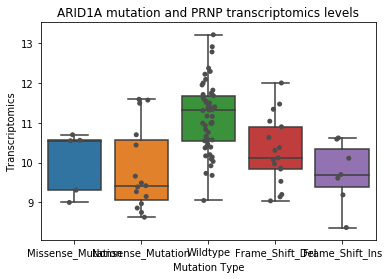

In [12]:

genedf = CPTAC.compare_mutations(transcriptomics, site, gene)
genedf = genedf.loc[genedf["Patient_Type"] == "Tumor"].drop("Patient_Type", axis = 1)
#print(genedf)

phos_boxplot = sns.boxplot(data=genedf, x="Mutation",y=site)
phos_boxplot.set_title(gene + " mutation and " + site + " transcriptomics levels")
phos_boxplot = sns.stripplot(data=genedf, x="Mutation", y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Mutation Type",ylabel="Transcriptomics")